In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [3]:
train_x.shape

(60000, 28, 28)

In [4]:
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

In [5]:
k = len(set(train_y))

In [6]:
i = Input(shape = train_x[0].shape)
x = Conv2D(32, (3, 3), activation = 'relu', strides = 2)(i)
x = Conv2D(64, (3, 3), activation = 'relu', strides = 2)(x)
x = Conv2D(128, (3, 3), activation = 'relu', strides = 2)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

In [7]:
model = Model(i, x)

In [8]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
r = model.fit(train_x, train_y, epochs = 20, validation_data = (test_x, test_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 32s 539us/sample - loss: 0.5381 - accuracy: 0.8065 - val_loss: 0.4253 - val_accuracy: 0.8419
Epoch 2/20
60000/60000 [==============================] - 31s 524us/sample - loss: 0.3921 - accuracy: 0.8540 - val_loss: 0.3894 - val_accuracy: 0.8527
Epoch 3/20
60000/60000 [==============================] - 34s 571us/sample - loss: 0.3561 - accuracy: 0.8673 - val_loss: 0.3544 - val_accuracy: 0.8667
Epoch 4/20
60000/60000 [==============================] - 32s 536us/sample - loss: 0.3344 - accuracy: 0.8750 - val_loss: 0.3595 - val_accuracy: 0.8640
Epoch 5/20
60000/60000 [==============================] - 32s 532us/sample - loss: 0.3163 - accuracy: 0.8809 - val_loss: 0.3779 - val_accuracy: 0.8613
Epoch 6/20
60000/60000 [==============================] - 31s 523us/sample - loss: 0.3044 - accuracy: 0.8846 - val_loss: 0.3737 - val_accuracy: 0.8687
Epoch 7/20
60000/60000 [====================

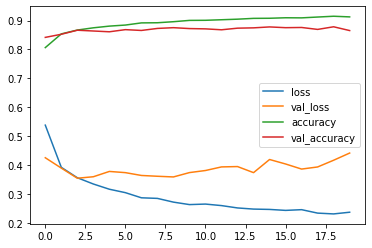

In [10]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()